In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [2]:
dfhouse = pd.read_csv("D:\Универ\ParisHousingClass.csv",sep=",")
dfhouse.head()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price,category
0,75523,3,0,1,63,9373,3,8,2005,0,1,4313,9005,956,0,7,7559081.5,Basic
1,80771,39,1,1,98,39381,8,6,2015,1,0,3653,2436,128,1,2,8085989.5,Luxury
2,55712,58,0,1,19,34457,6,8,2021,0,0,2937,8852,135,1,9,5574642.1,Basic
3,32316,47,0,0,6,27939,10,4,2012,0,1,659,7141,359,0,3,3232561.2,Basic
4,70429,19,1,1,90,38045,3,7,1990,1,0,8435,2429,292,1,4,7055052.0,Luxury


In [3]:
dfhouse.category.unique()

array(['Basic', 'Luxury'], dtype=object)

In [4]:
dfhouse.columns.drop('cityCode')

Index(['squareMeters', 'numberOfRooms', 'hasYard', 'hasPool', 'floors',
       'cityPartRange', 'numPrevOwners', 'made', 'isNewBuilt',
       'hasStormProtector', 'basement', 'attic', 'garage', 'hasStorageRoom',
       'hasGuestRoom', 'price', 'category'],
      dtype='object')

In [5]:
correlation = dfhouse.corr()
correlation

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityCode,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
squareMeters,1.000000,0.009573,-0.006650,-0.005594,0.001109,-0.001541,0.008758,0.016619,-0.007207,-0.010667,0.007480,-0.003960,-0.000588,-0.017246,-0.003486,-0.000623,0.999999
numberOfRooms,0.009573,1.000000,-0.011240,0.017015,0.022244,0.009040,0.008340,0.016766,0.003978,-0.002865,-0.001656,-0.013990,0.012061,0.023188,-0.004760,-0.015529,0.009591
hasYard,-0.006650,-0.011240,1.000000,0.015514,-0.000883,0.006760,0.005023,0.004279,0.002214,-0.008370,-0.007598,-0.008558,-0.003085,-0.004626,-0.009506,-0.007276,-0.006119
hasPool,-0.005594,0.017015,0.015514,1.000000,-0.004006,0.008072,0.014613,-0.006848,0.001894,0.000188,-0.001001,-0.007268,-0.011901,0.004832,0.001238,0.001123,-0.005070
floors,0.001109,0.022244,-0.000883,-0.004006,1.000000,0.002207,-0.004921,0.002463,0.005022,0.002458,-0.008566,0.006228,-0.000270,0.011303,0.003616,-0.021155,0.001654
cityCode,-0.001541,0.009040,0.006760,0.008072,0.002207,1.000000,0.011334,-0.007549,0.009266,-0.000224,-0.004941,0.002652,-0.002019,-0.002208,0.002554,-0.003338,-0.001539
cityPartRange,0.008758,0.008340,0.005023,0.014613,-0.004921,0.011334,1.000000,0.009238,0.007748,-0.001874,0.005224,0.004743,0.010696,-0.001648,-0.011338,-0.007153,0.008813
numPrevOwners,0.016619,0.016766,0.004279,-0.006848,0.002463,-0.007549,0.009238,1.000000,0.006858,-0.017420,0.002522,-0.000862,0.000719,0.020268,0.031707,-0.006082,0.016619
made,-0.007207,0.003978,0.002214,0.001894,0.005022,0.009266,0.007748,0.006858,1.000000,-0.001678,-0.000645,-0.005506,0.013773,0.005687,-0.007868,-0.005431,-0.007210
isNewBuilt,-0.010667,-0.002865,-0.008370,0.000188,0.002458,-0.000224,-0.001874,-0.017420,-0.001678,1.000000,0.003200,-0.015986,0.020127,0.002749,0.007011,0.019895,-0.010643


<AxesSubplot:>

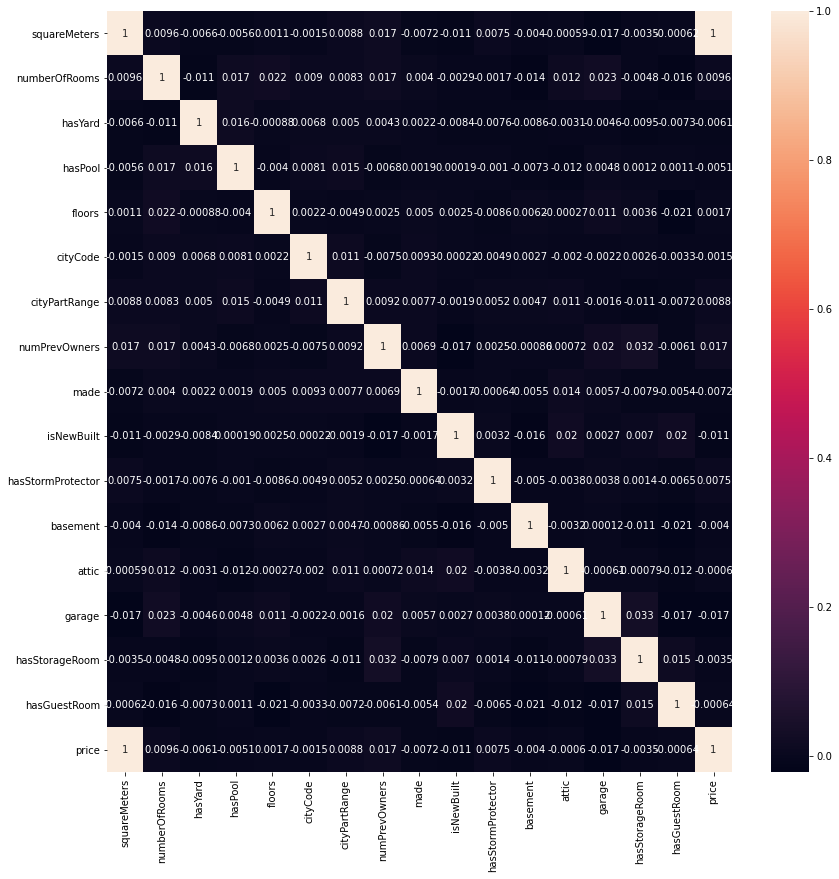

In [6]:
fig, ax = plt.subplots(figsize=(14,14))
sns.heatmap(correlation,annot=True)

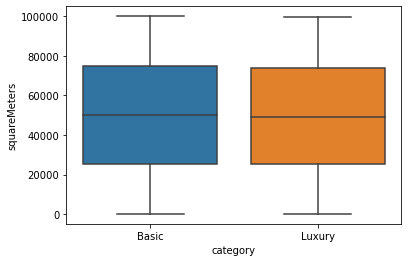

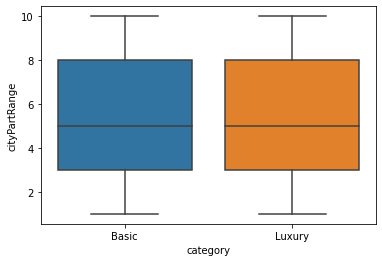

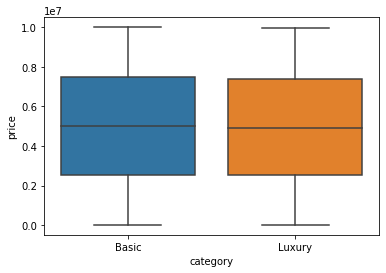

In [7]:
Columns = ["squareMeters","cityPartRange","price"]
for item in Columns:
    sns.boxplot(x="category", y=item, data=dfhouse)
    plt.show()

<AxesSubplot:title={'center':'made'}, xlabel='made', ylabel='Count'>

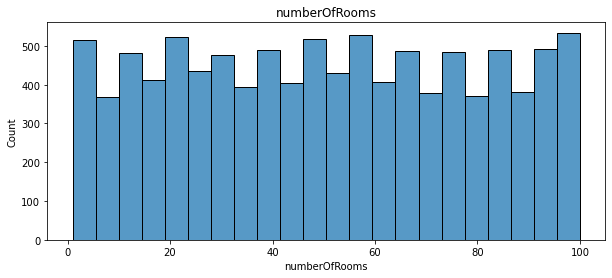

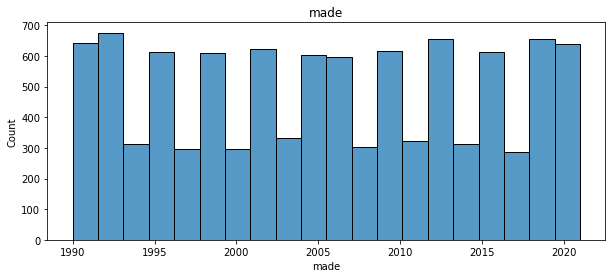

In [8]:
plt.figure(3, figsize=(10,4)) 
plt.title("numberOfRooms")
sns.histplot(dfhouse['numberOfRooms'])

plt.figure(2, figsize=(10,4))
plt.title("made")
sns.histplot(dfhouse['made'])

In [54]:
continiousColumns = ["squareMeters", "numberOfRooms", "hasYard", "hasPool", "floors", "cityPartRange", "numPrevOwners", "made", "isNewBuilt", "hasStormProtector", "basement", "attic", "garage", "hasStorageRoom", "hasGuestRoom", "price"]
willScale  = continiousColumns

In [55]:
minMaxScaler = MinMaxScaler()
scaledColums = pd.DataFrame(minMaxScaler.fit_transform(dfhouse[willScale]),columns=willScale)
scaledColums.describe()

,squareMeters,numberOfRooms,hasYard,hasPool,floors,cityPartRange,numPrevOwners,made,isNewBuilt,hasStormProtector,basement,attic,garage,hasStorageRoom,hasGuestRoom,price
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,0.498260,0.498570,0.508700,0.496800,0.497740,0.501122,0.502411,0.499629,0.499100,0.499900,0.503310,0.502751,0.503468,0.503000,0.499460,0.498490
std,0.288003,0.291078,0.499949,0.500015,0.291810,0.319114,0.317407,0.300261,0.500024,0.500025,0.287673,0.289462,0.291167,0.500016,0.317641,0.287844
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250320,0.242424,0.000000,0.000000,0.242424,0.222222,0.222222,0.225806,0.000000,0.000000,0.255975,0.251125,0.253056,0.000000,0.200000,0.250698
50%,0.500616,0.494949,1.000000,0.000000,0.494949,0.444444,0.444444,0.500000,0.000000,0.000000,0.509250,0.504450,0.504444,1.000000,0.500000,0.500764
75%,0.745879,0.747475,1.000000,1.000000,0.757576,0.777778,0.777778,0.774194,1.000000,1.000000,0.751125,0.754025,0.752500,1.000000,0.800000,0.746142
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [56]:
target = ["category"]
features = dfhouse.columns.drop(target)
train,test = train_test_split(dfhouse,test_size = 0.33,random_state= 12)
xTrain = train[features]
yTrain = train[target]
xTest  = test[features]
yTest = test[target]

In [57]:
knnModel = KNeighborsClassifier(n_neighbors=4) 
knnModel.fit(xTrain,yTrain.values.ravel())

KNeighborsClassifier(n_neighbors=4)

In [58]:
yPred= knnModel.predict(xTest)
accuracy_score(yTest,yPred)

0.8618181818181818

In [59]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

       Basic       0.87      0.99      0.93      2868
      Luxury       0.00      0.00      0.00       432

    accuracy                           0.86      3300
   macro avg       0.43      0.50      0.46      3300
weighted avg       0.75      0.86      0.80      3300



<AxesSubplot:>

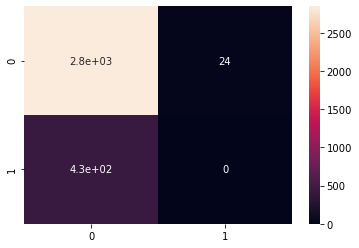

In [60]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [61]:
dTree = DecisionTreeClassifier()
dTree.fit(xTrain, yTrain)

DecisionTreeClassifier()

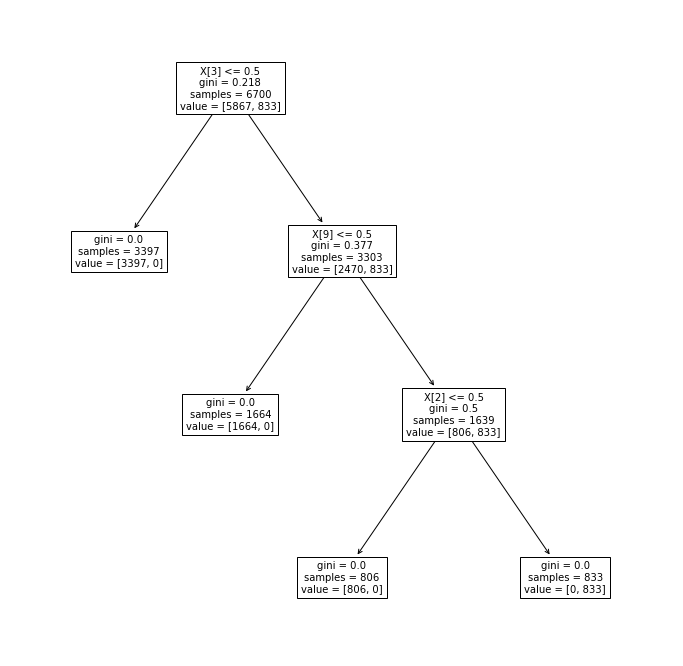

In [62]:
plt.figure(figsize=(12,12))
plot_tree(dTree, fontsize=10)
plt.show()

In [63]:
yPred = dTree.predict(xTest)
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      2868
      Luxury       1.00      1.00      1.00       432

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



In [64]:
yPred= dTree.predict(xTest)
accuracy_score(yTest,yPred)

1.0

<AxesSubplot:>

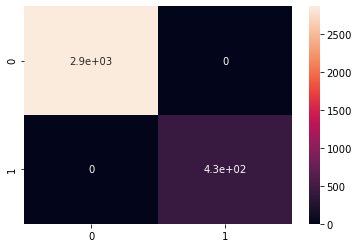

In [65]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [66]:
SVC_clsfr = SVC(kernel='rbf', C=100, gamma=0.01)
SVC_clsfr.fit(xTrain,yTrain.values.ravel())

SVC(C=100, gamma=0.01)

In [67]:
yPred= SVC_clsfr.predict(xTest)
accuracy_score(yTest,yPred)

0.8690909090909091

In [68]:
print(classification_report(yTest,yPred,zero_division=0))

              precision    recall  f1-score   support

       Basic       0.87      1.00      0.93      2868
      Luxury       0.00      0.00      0.00       432

    accuracy                           0.87      3300
   macro avg       0.43      0.50      0.46      3300
weighted avg       0.76      0.87      0.81      3300



<AxesSubplot:>

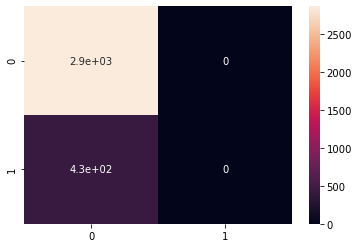

In [69]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [72]:
rForest = RandomForestClassifier(n_estimators = 15)
rForest.fit(xTrain,yTrain.values.ravel())

RandomForestClassifier(n_estimators=15)

In [73]:
yPred= rForest.predict(xTest)
accuracy_score(yTest,yPred)

1.0

In [74]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      2868
      Luxury       1.00      1.00      1.00       432

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



<AxesSubplot:>

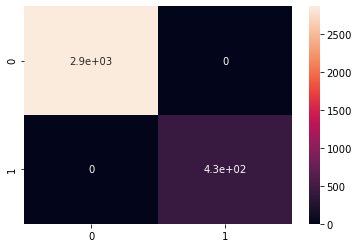

In [75]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)

In [76]:
AdaB = AdaBoostClassifier(n_estimators=20, learning_rate=0.1)
AdaB.fit(xTrain,yTrain.values.ravel())

AdaBoostClassifier(learning_rate=0.1, n_estimators=20)

In [77]:
yPred= AdaB.predict(xTest)
accuracy_score(yTest,yPred)

1.0

In [78]:
print(classification_report(yTest,yPred))

              precision    recall  f1-score   support

       Basic       1.00      1.00      1.00      2868
      Luxury       1.00      1.00      1.00       432

    accuracy                           1.00      3300
   macro avg       1.00      1.00      1.00      3300
weighted avg       1.00      1.00      1.00      3300



<AxesSubplot:>

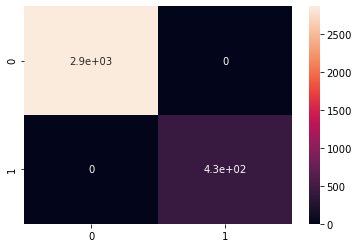

In [79]:
sns.heatmap(confusion_matrix(yTest,yPred),annot=True)